<a href="https://colab.research.google.com/github/YousefEldaly/EgyptPrioneers-GenAI/blob/main/labs/Day5_RNN_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.callbacks import Callback
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Embedding, LSTM

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/IMDB Dataset.csv")

In [ ]:
data.shape

(50000, 2)

In [ ]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
data.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


In [ ]:
data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [ ]:
data.replace('positive', 1, inplace=True)
data.replace('negative', 0, inplace=True)

In [ ]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


from matplotlib import pyplot as plt
_df_0['sentiment'].plot(kind='hist', bins=20, title='sentiment')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('review').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['sentiment'].plot(kind='line', figsize=(8, 4), title='sentiment')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_3['review'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_3, x='sentiment', y='review', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<function matplotlib.pyplot.show(close=None, block=None)>

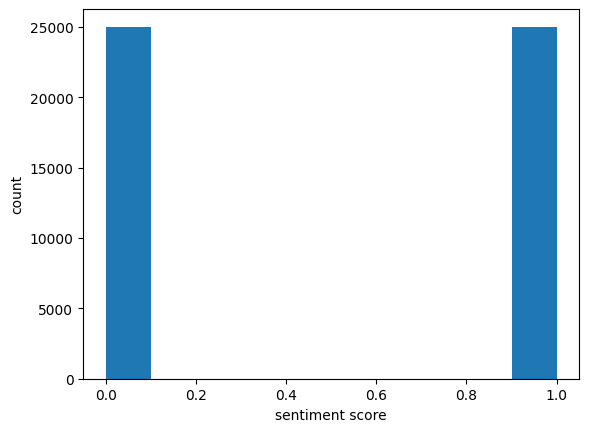

In [ ]:
sentiment = data['sentiment']
plt.hist(sentiment)
plt.xlabel('sentiment score')
plt.ylabel('count')
plt.show

In [ ]:
data['sentiment'].value_counts()

sentiment
1    25000
0    25000
Name: count, dtype: int64

In [ ]:
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

In [ ]:
print(f'train data shape: {train_data.shape}')
print(f'test data shape: {test_data.shape}')

train data shape: (40000, 2)
test data shape: (10000, 2)


In [ ]:
#study more about tokenizers
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(train_data['review'])
X_train = pad_sequences(tokenizer.texts_to_sequences(train_data['review']), maxlen=200)
X_test = pad_sequences(tokenizer.texts_to_sequences(test_data['review']), maxlen=200)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(40000, 200)
(10000, 200)


In [ ]:
print(X_train)

[[1935    1 1200 ...  205  351 3856]
 [   3 1651  595 ...   89  103    9]
 [   0    0    0 ...    2  710   62]
 ...
 [   0    0    0 ... 1641    2  603]
 [   0    0    0 ...  245  103  125]
 [   0    0    0 ...   70   73 2062]]


In [ ]:
Y_train = train_data['sentiment']
Y_test = test_data['sentiment']

In [ ]:
print(Y_train)

39087    0
30893    0
45278    1
16398    0
13653    0
        ..
11284    1
44732    1
38158    0
860      1
15795    1
Name: sentiment, Length: 40000, dtype: int64


In [ ]:
print(Y_test)

33553    1
9427     1
199      0
12447    1
39489    0
        ..
28567    0
25079    1
18707    1
15200    0
5857     1
Name: sentiment, Length: 10000, dtype: int64


In [ ]:
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=200)) #output_dim each single token is represented by 1*128 vector
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2)) # search for thisssss
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 128)          640000    
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 771713 (2.94 MB)
Trainable params: 771713 (2.94 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train, Y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
500/500 [==============================] - 218s 428ms/step - loss: 0.3972 - accuracy: 0.8190 - val_loss: 0.3434 - val_accuracy: 0.8558
Epoch 2/5
500/500 [==============================] - 196s 392ms/step - loss: 0.2673 - accuracy: 0.8941 - val_loss: 0.3028 - val_accuracy: 0.8794
Epoch 3/5
500/500 [==============================] - 193s 387ms/step - loss: 0.2427 - accuracy: 0.9039 - val_loss: 0.3165 - val_accuracy: 0.8726
Epoch 4/5
500/500 [==============================] - 193s 387ms/step - loss: 0.1967 - accuracy: 0.9235 - val_loss: 0.3217 - val_accuracy: 0.8636
Epoch 5/5
500/500 [==============================] - 194s 388ms/step - loss: 0.1743 - accuracy: 0.9329 - val_loss: 0.3289 - val_accuracy: 0.8751


In [ ]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(f'test loss: {loss}')
print(f'test accuracy: {accuracy}') ##increase token size input_length, output_dim then run against accuracy

313/313 [==============================] - 21s 65ms/step - loss: 0.3187 - accuracy: 0.8783
test loss: 0.31872525811195374
test accuracy: 0.8783000111579895


In [ ]:
def predict_sentiment(review):
  sequence = tokenizer.texts_to_sequences([review])
  padded_sequence = pad_sequences(sequence, maxlen=200)
  prediction = model.predict(padded_sequence)
  if prediction > 0.5:
    return 'positive'
  else:
    return 'negative'

In [ ]:
new_review = "This movie was not that terrible"
sentiment = predict_sentiment(new_review)
print(f'The Sentiment of the review is: {sentiment}')

1/1 [==============================] - 0s 64ms/step
The Sentiment of the review is: negative


In [ ]:
new_review2 = "This movie was fantastic, i love it"
sentiment2 = predict_sentiment(new_review2)
print(f'The Sentiment of the review is: {sentiment2}')

1/1 [==============================] - 0s 63ms/step
The Sentiment of the review is: positive
